In [23]:
import xarray as xr
from cartopy import config
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import matplotlib.pyplot as plt
import numpy as np

In [1]:
filename = 'f2ba5fd9-db70-4250-8bb9-dafdf1f5ffc8-ASurf_WFDE5_CRU_v2_area_subset.nc'

In [3]:
ds_gpa = xr.open_dataset(filename)

In [4]:
ds_gpa

<xarray.Dataset>
Dimensions:  (lat: 47, lon: 88)
Coordinates:
  * lat      (lat) float64 16.25 16.75 17.25 17.75 ... 37.75 38.25 38.75 39.25
  * lon      (lon) float64 61.25 61.75 62.25 62.75 ... 103.2 103.8 104.2 104.8
Data variables:
    ASurf    (lat, lon) float32 ...
Attributes:
    title:        WATCH Forcing Data methodology applied to ERA5 data
    institution:  Copernicus Climate Change Service
    contact:      http://copernicus-support.ecmwf.int
    comment:      Methodology implementation for ERA5 and dataset production ...
    Conventions:  CF-1.7
    summary:      CRU grid-points altitudes; Genuine land points from CRU gri...
    reference:    Cucchi et al., 2020, Earth Syst. Sci. Data, 12(3), 2097–212...
    licence:      The dataset is distributed under the Licence to Use Coperni...

In [13]:
lat = ds_gpa.lat
lon = ds_gpa.lon
gpa = ds_gpa.ASurf

## Map of the Hindu Kush-Himalaya region

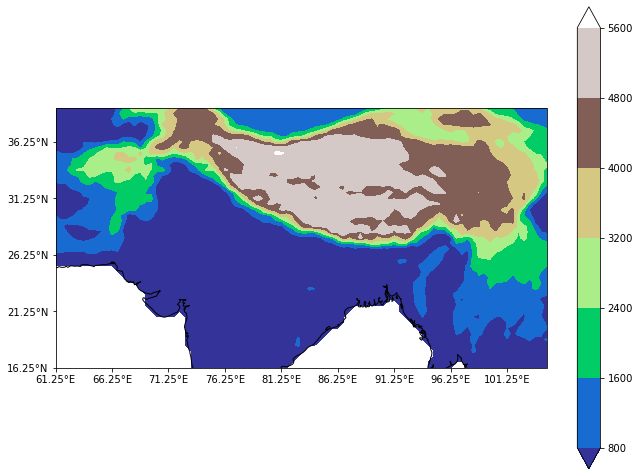

In [35]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Make a filled contour plot
cs = ax.contourf(lon, lat, gpa,
             transform=ccrs.PlateCarree(), cmap='terrain',extend='both')

# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(lon.min(),lon.max(),5), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(lat.min(), lat.max(),5), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Add colorbar
cbar = plt.colorbar(cs)

## Map of the Bundhi-Gandaki catchment

In [52]:
#### Bundhi Gandaki catchment #####

south = 26
north = 30
west = 82
east = 86

In [59]:
# Select a subset of the dataset

ds_bg = ds_gpa.sel(lon=slice(west,east),lat=slice(south,north))
ds_bg

<xarray.Dataset>
Dimensions:  (lat: 8, lon: 8)
Coordinates:
  * lat      (lat) float64 26.25 26.75 27.25 27.75 28.25 28.75 29.25 29.75
  * lon      (lon) float64 82.25 82.75 83.25 83.75 84.25 84.75 85.25 85.75
Data variables:
    ASurf    (lat, lon) float32 91.0 85.0 67.0 ... 5.305e+03 5.402e+03 5.426e+03
Attributes:
    title:        WATCH Forcing Data methodology applied to ERA5 data
    institution:  Copernicus Climate Change Service
    contact:      http://copernicus-support.ecmwf.int
    comment:      Methodology implementation for ERA5 and dataset production ...
    Conventions:  CF-1.7
    summary:      CRU grid-points altitudes; Genuine land points from CRU gri...
    reference:    Cucchi et al., 2020, Earth Syst. Sci. Data, 12(3), 2097–212...
    licence:      The dataset is distributed under the Licence to Use Coperni...

In [60]:
lat_bg = ds_bg.lat
lon_bg = ds_bg.lon
gpa_bg = ds_bg.ASurf

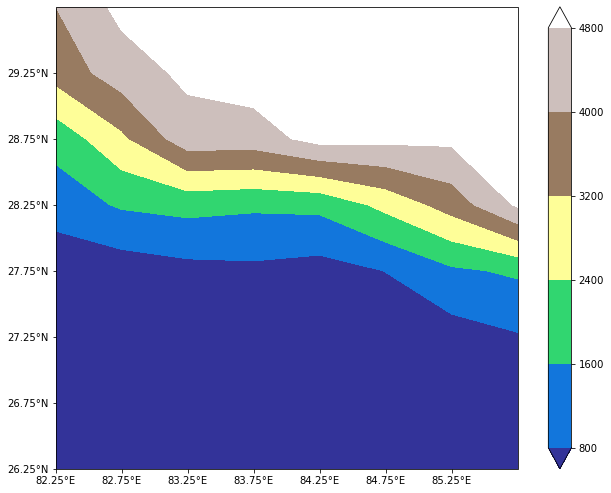

In [64]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Make a filled contour plot
cs = ax.contourf(lon_bg, lat_bg, gpa_bg,
             transform=ccrs.PlateCarree(), cmap='terrain',extend='both')

# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(lon_bg.min(),lon_bg.max(),0.5), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(lat_bg.min(), lat_bg.max(),0.5), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Add colorbar
cbar = plt.colorbar(cs)